https://wfdb.readthedocs.io/en/latest/

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

In [2]:
def savenpy(dir,data):
    if not os.path.isdir(dir):
        os.makedirs(dir,exist_ok=True)
    np.save(dir,data)


In [7]:
DATA_ROOT = r"Z:google-wdb\matched\matched"
DATA_DIR = r"..\data"
n = 8

### 表示とセーブ

1 folders found
34 header files found
3269321_0004


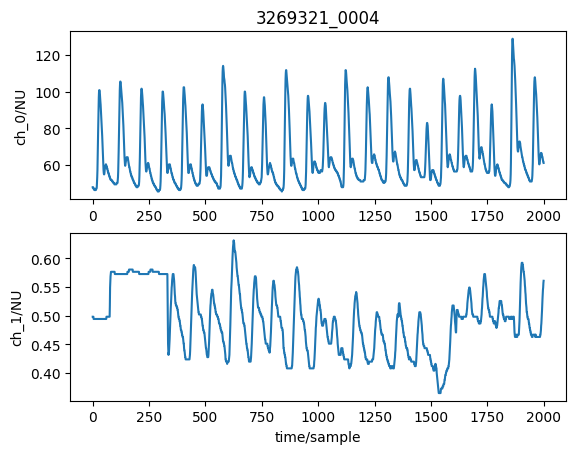

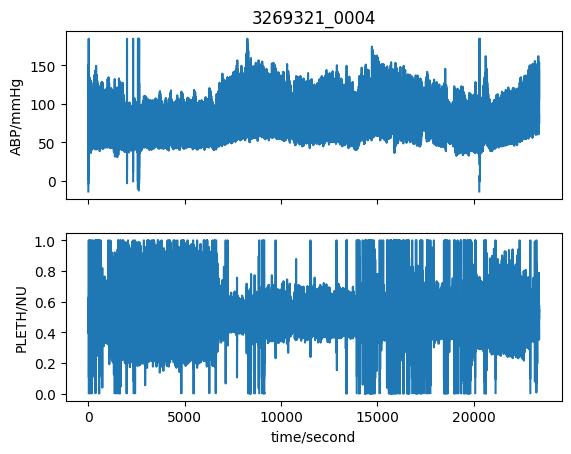

3269321_0005


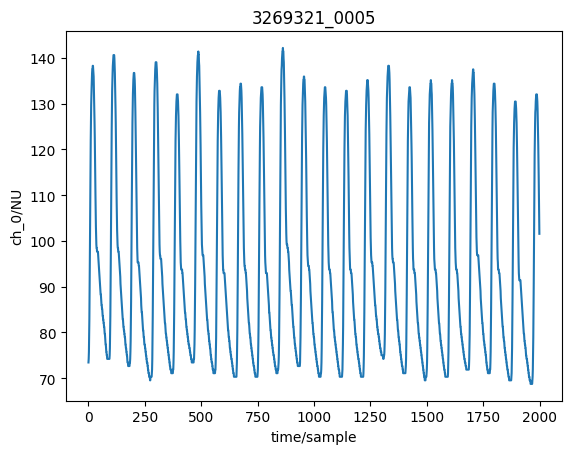

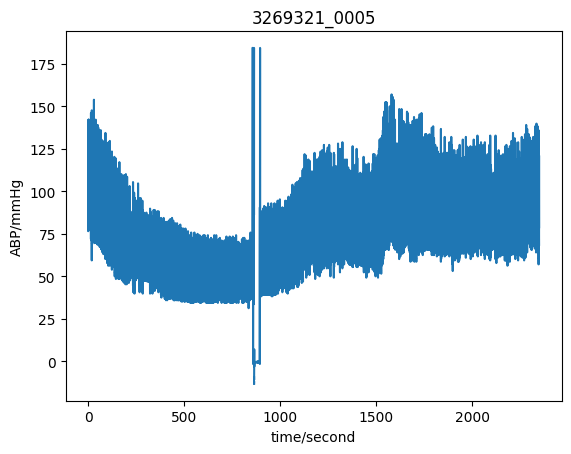

3269321_0006


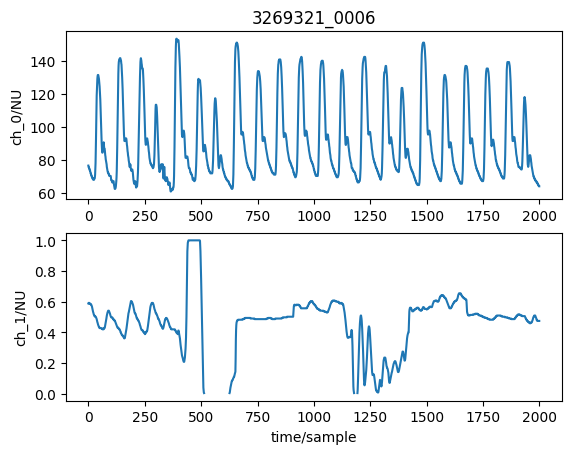

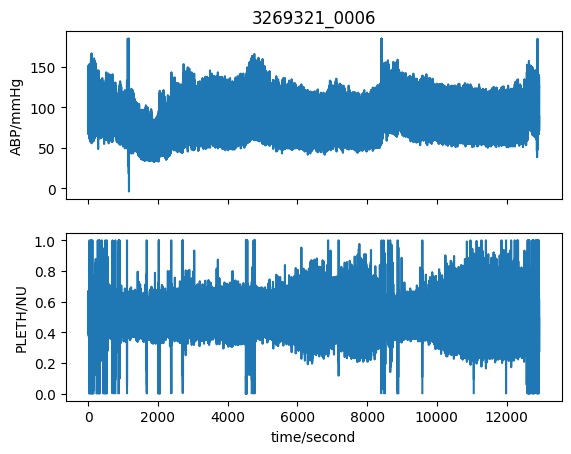

3269321_0007


ValueError: sampfrom must be shorter than the signal length

In [15]:
for i in range(8):
    folders = glob.glob(DATA_ROOT+f"\p0{i}\p000878")
    print(len(folders),"folders found")
    for folder in folders:
        heas = glob.glob(folder+"\*.hea")
        print(len(heas),'header files found')
        for hea in heas:
            if '_layout' in hea:
                continue
            name = os.path.splitext(os.path.basename(hea))[0]
            if name.startswith('p'):
                continue
            print(name)
            record = wfdb.rdrecord(os.path.splitext(hea)[0],channel_names=['ABP','PLETH'])
            signals, fields = wfdb.rdsamp(os.path.splitext(hea)[0],sampfrom=4000,sampto=6000,channel_names=['ABP','PLETH'])
            wfdb.plot_items(signal=signals, fs=fields['fs'], title=name)
            # record = wfdb.rdrecord(os.path.splitext(hea)[0])
            # if record.n_sig < 2:
            #     continue
            wfdb.plot_wfdb(record=record, title=name)
            # display(record._dict_)
        break
    break

### ABPのないファイルを削除 

In [41]:
for i in range(8):
    txt = open(f"../data/raw/no_ABP_0{i}.txt", mode='w')
    txt_ppg = open(f"../data/raw/has_PPG_ABP_0{i}.txt",mode='w')
    # {p00, p01,...,p09}/*のフォルダを取得
    folders = glob.glob(DATA_ROOT+f"/p0{i}/*")
    print(f"p0{i}:",len(folders),"folders found")
    for i in tqdm(range(len(folders))):
        # p0n/*にある x_layout.heaを取得（複数）
        layout_heas = glob.glob(folders[i]+"/*_layout.hea")
        # print(layout_heas)
        noabp_ids = []
        abp_ids = []
        for layout_hea in layout_heas:
            #id:  x_layout.hea のx
            id = os.path.basename(layout_hea)[:7]
            with open(layout_hea, mode='r') as f:
                lh  = f.read()
                # x_layout.hea (信号全部)にABPがあればabp_idsに。ないならnoabp_idsに
                if not 'ABP' in lh:
                    noabp_ids.append(id)
                else:
                    abp_ids.append(id)
        # print(noabp_ids,abp_ids)
        # no ABP
        # .heaの中身を見ずにno_ABP_0{i}.txtにメモ
        for id in noabp_ids:
            noabp_heas = glob.glob(folders[i]+f"/{id}_*")
            for hea in noabp_heas:
                if '_layout' in hea:
                    continue
                if os.path.splitext(os.path.basename(hea))[0].startswith('p'):
                    continue
                else:
                    txt.write(hea[49:]+'\n')
        # has ABP
        # 各セグメント(x_00yy.hea)の中身を見て、abpがなければno_ABP_0{i}.txtにメモ
        # PLETHがあればhas_PPG_ABP_0{i}.txtにメモ
        for id in abp_ids:
            abp_heas = glob.glob(folders[i]+f"/{id}_*.hea")
            for hea in abp_heas:
                if '_layout' in hea:
                    continue
                name = os.path.splitext(os.path.basename(hea))[0]
                if name.startswith('p'):
                    continue
                with open(hea, mode='r') as file:
                    h = file.read()
                    if not 'ABP' in h:
                        txt.write(hea[49:]+'\n')
                        txt.write(hea[49:-3]+'dat\n')
                    elif 'PLETH' in h:
                        txt_ppg.write(hea[49:]+'\n')
                        txt_ppg.write(hea[49:-3]+'dat\n')
        # heas = glob.glob(folders[i]+"/*.hea")
        # for hea in heas:
        #     if '_layout' in hea:
        #         continue
        #     name = os.path.splitext(os.path.basename(hea))[0]
        #     if name.startswith('p'):
        #         continue
        #     with open(hea, mode='r') as h:
        #         if not 'ABP' in h:
        #             txt.write(hea[49:]+'\n')
        #             txt.write(hea[49:-3]+'dat\n')
        #         elif 'PLETH' in h:
        #             txt_ppg.write(hea[49:]+'\n')
        #             txt_ppg.write(hea[49:-3]+'dat\n')
    txt.close()
    txt_ppg.close()

p00: 1244 folders found


 12%|█▏        | 155/1244 [07:55<1:10:47,  3.90s/it]

In [31]:
txt.close()
txt_ppg.close()